<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [13]:
# Load Dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_full.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
# Create Validation Set
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

This is a 'Coat'


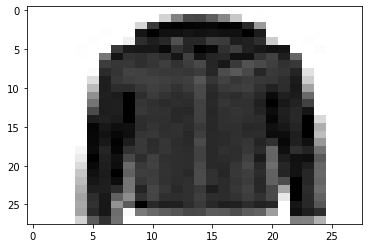

In [15]:
# Visualize Dataset
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

idx = 0
print(f"This is a '{class_names[y_train[idx]]}'")
plt.imshow(x_train[idx], aspect="auto", cmap="binary")

In [16]:
# Create Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7183 - accuracy: 0.7682 - val_loss: 0.5298 - val_accuracy: 0.8128
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4885 - accuracy: 0.8285 - val_loss: 0.4417 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4445 - accuracy: 0.8436 - val_loss: 0.4297 - val_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4175 - accuracy: 0.8536 - val_loss: 0.4279 - val_accuracy: 0.8474
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3964 - accuracy: 0.8605 - val_loss: 0.4101 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3803 - accuracy: 0.8666 - val_loss: 0.3710 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3671 - accuracy: 0.8694 - val_loss: 0.3596 - val_accuracy:

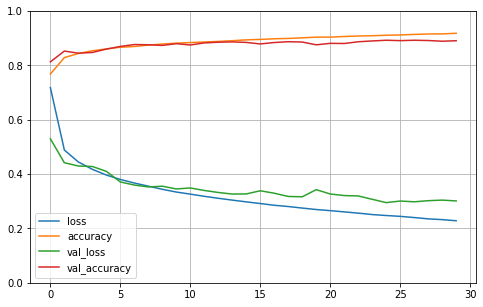

In [18]:
# Visualize training
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
# Evaluate Model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 84.48%


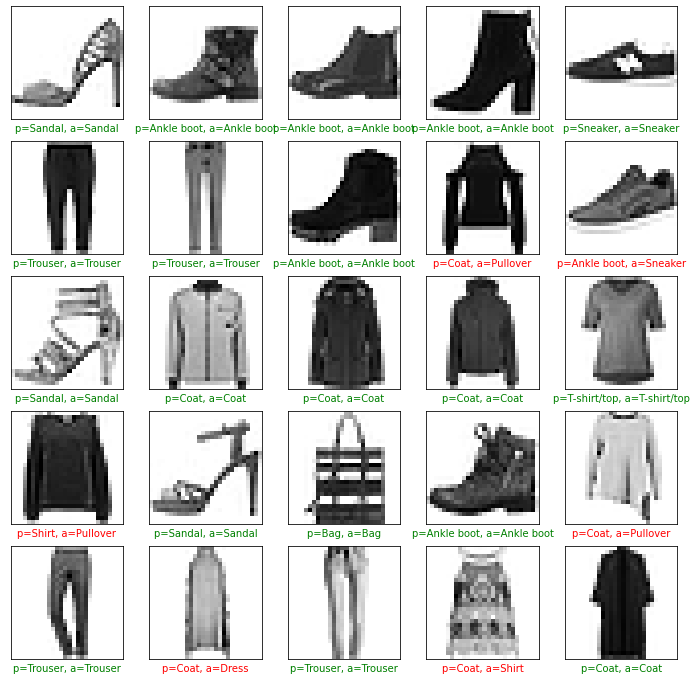

In [22]:
# Predict
indices = np.random.randint(x_test.shape[0], size=25)
plt.figure(figsize=(12,12))

predictions = model.predict(x_test)
for idx, i in enumerate(indices):
  plt.subplot(5, 5, idx+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  prediction = class_names[np.argmax(predictions[i])]
  actualVal = class_names[y_test[i]]

  col = "g" if prediction == actualVal else "r"
  plt.xlabel(f"p={prediction}, a={actualVal}", color=col)
  plt.imshow(x_test[i], cmap="binary")